<a href="https://colab.research.google.com/github/LwinShwe/assignments/blob/master/DATA_602_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**
Student Name: Lwin N. Shwe

In [30]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library 
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
# Load datasets here once and assign to variables iris and boston

!pip install scikit-learn

from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


#diabetes = 
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [12]:

# Create a DataFrame from the iris data
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
df1['target'] = iris.target

# Display the DataFrame
print(df1.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

  

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [22]:
# Create the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with the Iris dataset
knn.fit(iris.data, iris.target)

# New observations to predict their categories
new_observations = [
    [6.2, 2.9, 4.3, 2.7],
    [4.6,7.3, 2.9, 6.3]
]

# Predict the categories of new observations
predictions = knn.predict(new_observations)

# Get the target names of each prediction
target_names = iris.target_names[predictions]

# Print the predicted target names
print(target_names)


['virginica' 'virginica']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [34]:
test_size = 0.3  # 30% of the data will be allocated to the testing set

# Split the Iris dataset into a train / test model 
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=test_size, random_state=42
)

# Print the sizes of the resulting datasets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 105
Testing set size: 45


Preliminary model score:
0.9555555555555556


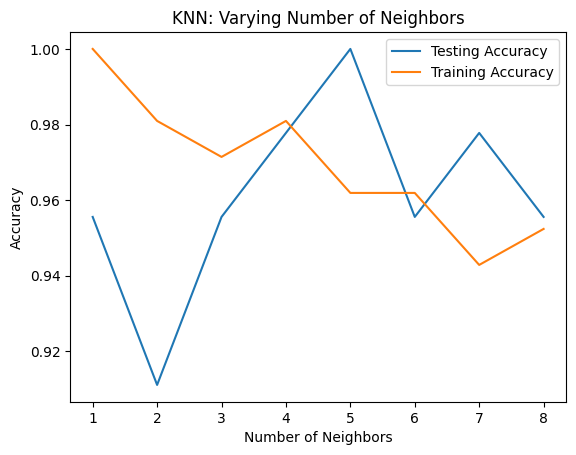

In [24]:

#Split arrays or matrices into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

print("Preliminary model score:")
print(knn.score(X_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k) # instantiate the classifier
    knn.fit(X_train,y_train)  # Fit the classifier to the training data
    
   
    train_accuracy[i] = knn.score(X_train, y_train)   # Compute accuracy on the training set
    test_accuracy[i] = knn.score(X_test, y_test)  # Compute accuracy on the testing set

# Visualization of k values vs accuracy

plt.title('KNN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

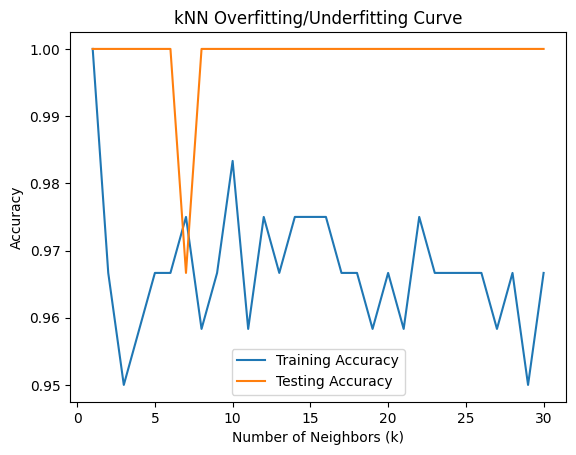

In [20]:

# Define a range of neighbor (k) values
k_values = range(1, 31)

# Initialize lists to store training and testing accuracy scores
train_scores = []
test_scores = []

# Iterate over each k value
for k in k_values:
    # Create the kNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model with the training data
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy score
    train_score = knn.score(X_train, y_train)
    
    # Calculate testing accuracy score
    test_score = knn.score(X_test, y_test)
    
    # Append the scores to the respective lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the overfitting / underfitting curves
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Overfitting/Underfitting Curve')
plt.legend()
plt.show()


**Q5** 

**Data set: Diabetes**


* Load sklearn's Diabetes data into a DataFrame (only the data and feature_name as column names)

* Load sklearn's Diabetes target values into a separate DataFrame

* Return back the average of age, sex, body mass index, blood pressure, etc.

In [13]:
df1= pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df1['target'] = diabetes.target

print(df1.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


**Q6** 

**Data set: Boston**

* In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

* Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

* Return back PTRATIO as a NumPy array

***  Unfortunately, Boston Dataset could not be retrieved from scikit learn library. ***

**Q7**

**Data set: Boston**

* Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib


* Use np.linspace() to generate prediction X values from min to max PTRATIO

* Return back the regression prediction space and regression predicted values

* Make sure to labels axes appropriately